In [ ]:
!nvidia-smi

Sun Dec  5 02:19:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!cp -r /content/drive/MyDrive/croc-hack/охотское_море.zip .

In [ ]:
!unzip /content/охотское_море.zip 

Archive:  /content/охотское_море.zip
  inflating: охотское_море/2020/DJI_0082.JPG  
  inflating: охотское_море/2020/DJI_0083.JPG  
  inflating: охотское_море/2020/DJI_0084.JPG  
  inflating: охотское_море/2020/DJI_0085.JPG  
  inflating: охотское_море/2020/DJI_0086.JPG  
  inflating: охотское_море/2020/DJI_0087.JPG  
  inflating: охотское_море/2020/DJI_0088.JPG  
  inflating: охотское_море/2020/DJI_0089.JPG  
  inflating: охотское_море/2020/DJI_0090.JPG  
  inflating: охотское_море/2020/DJI_0091.JPG  
  inflating: охотское_море/2020/DJI_0092.JPG  
  inflating: охотское_море/2020/DJI_0093.JPG  
  inflating: охотское_море/2020/DJI_0094.JPG  
  inflating: охотское_море/2020/DJI_0095.JPG  
  inflating: охотское_море/2020/DJI_0096.JPG  
  inflating: охотское_море/2020/DJI_0097.JPG  
  inflating: охотское_море/2020/DJI_0098.JPG  
  inflating: охотское_море/2020/DJI_0099.JPG  
  inflating: охотское_море/2020/DJI_0100.JPG  
  inflating: охотское_море/2020/DJI_0101.JPG  
  inflating: охотское_м

In [ ]:
!cp -r /content/drive/MyDrive/croc-hack/pseudo_labels/ .

In [1]:
import torch, torchvision
import numpy as np
import os, json, cv2, random, yaml
from skimage.io import imread
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
def rleToMask(rleString,height,width):
  '''
  This function is an rle to mask converter.
  You supply the rle string for one mask, along with it's height and width
  and it will return the mask.
  '''
  rows,cols = height,width
  rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
  rlePairs = np.array(rleNumbers).reshape(-1,2)
  img = np.zeros(rows*cols,dtype=np.uint8)
  for index,length in rlePairs:
    index -= 1
    img[index:index+length] = 1
  img = img.reshape(cols,rows)
  img = img.T
  return img


def create_masks_from_df(df,mask_folder):
  for pic_name in tqdm(list(df['PICTURE_NAME'].unique())):
    print(pic_name)
    png_name = (pic_name.split('.')[0]) +'.png'
    lb = df[df['PICTURE_NAME']==pic_name]
    arr = np.zeros((5472,3648,3),dtype = np.uint8)
    for class_name in list(df['OBJECT_TYPE'].unique()):
      mask = np.ones((5472,3648,3),dtype = np.uint8) * rleToMask(lb[lb['OBJECT_TYPE'] == class_name]['Mask'].iloc[0],5472,3648).reshape(5472,3648,1)*np.array([255,255,255])
      arr = arr + mask
      cv2.imwrite(os.path.join(mask_folder,pic_name.split('.')[0]+ '_' + class_name + '.png'),mask)




In [ ]:
!mkdir 4river_1km

In [4]:

labels_coast = pd.read_csv('/content/pseudo_labels/4river_solution.csv',sep  = ',')
labels_coast['PICTURE_NUM'] = [int(i.split('_')[1]) for i in labels_coast['Type_Id']]
labels_coast['OBJECT_TYPE'] = [str(i.split('_')[0]) for i in labels_coast['Type_Id']]
labels_coast['PICTURE_NAME'] = [f'DJI_{i:04}.JPG'  for i in labels_coast['PICTURE_NUM']]

In [3]:

labels_coast1 = pd.read_csv('/content/pseudo_labels/coast2_solution.csv',sep  = ',')
labels_coast1['PICTURE_NUM'] = [int(i.split('_')[1]) for i in labels_coast1['Type_Id']]
labels_coast1['OBJECT_TYPE'] = [str(i.split('_')[0]) for i in labels_coast1['Type_Id']]
labels_coast1['PICTURE_NAME'] = [f'DJI_{i:04}.JPG'  for i in labels_coast1['PICTURE_NUM']]

In [4]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

In [59]:
!mkdir coast2

In [78]:
!rm -r /content/охотское_море/побережье2/.ipynb_checkpoints/

rm: cannot remove '/content/охотское_море/побережье2/.ipynb_checkpoints/': No such file or directory


In [74]:
os.listdir('/content/охотское_море/побережье2')

['DJI_0466.JPG',
 'DJI_0859.JPG',
 'DJI_0769.JPG',
 'DJI_0343.JPG',
 'DJI_0574.JPG',
 'DJI_0592.JPG',
 'DJI_0826.JPG',
 'DJI_0169.JPG',
 'DJI_0184.JPG',
 'DJI_0697.JPG',
 'DJI_0829.JPG',
 'DJI_0115.JPG',
 'DJI_0724.JPG',
 'DJI_0190.JPG',
 'DJI_0217.JPG',
 'DJI_0430.JPG',
 'DJI_0040.JPG',
 'DJI_0568.JPG',
 'DJI_0883.JPG',
 'DJI_0601.JPG',
 'DJI_0727.JPG',
 'DJI_0205.JPG',
 'DJI_0667.JPG',
 'DJI_0784.JPG',
 'DJI_0853.JPG',
 'DJI_0250.JPG',
 'DJI_0301.JPG',
 'DJI_0463.JPG',
 'DJI_0145.JPG',
 'DJI_0400.JPG',
 'DJI_0655.JPG',
 'DJI_0019.JPG',
 'DJI_0556.JPG',
 'DJI_0433.JPG',
 'DJI_0415.JPG',
 'DJI_0007.JPG',
 'DJI_0976.JPG',
 'DJI_0154.JPG',
 'DJI_0910.JPG',
 'DJI_0094.JPG',
 'DJI_0733.JPG',
 'DJI_0307.JPG',
 'DJI_0031.JPG',
 'DJI_0067.JPG',
 'DJI_0721.JPG',
 'DJI_0043.JPG',
 'DJI_0685.JPG',
 'DJI_0940.JPG',
 'DJI_0049.JPG',
 'DJI_0304.JPG',
 'DJI_0583.JPG',
 'DJI_0322.JPG',
 'DJI_0631.JPG',
 'DJI_0448.JPG',
 'DJI_0934.JPG',
 'DJI_0199.JPG',
 'DJI_0334.JPG',
 'DJI_0649.JPG',
 'DJI_0085.JPG

array(['DJI_0004.JPG', 'DJI_0007.JPG', 'DJI_0010.JPG', 'DJI_0013.JPG',
       'DJI_0016.JPG', 'DJI_0019.JPG', 'DJI_0022.JPG', 'DJI_0025.JPG',
       'DJI_0028.JPG', 'DJI_0031.JPG', 'DJI_0040.JPG', 'DJI_0043.JPG',
       'DJI_0046.JPG', 'DJI_0049.JPG', 'DJI_0052.JPG', 'DJI_0055.JPG',
       'DJI_0061.JPG', 'DJI_0064.JPG', 'DJI_0067.JPG', 'DJI_0070.JPG',
       'DJI_0073.JPG', 'DJI_0076.JPG', 'DJI_0085.JPG', 'DJI_0088.JPG',
       'DJI_0091.JPG', 'DJI_0094.JPG', 'DJI_0097.JPG', 'DJI_0100.JPG',
       'DJI_0103.JPG', 'DJI_0106.JPG', 'DJI_0109.JPG', 'DJI_0112.JPG',
       'DJI_0115.JPG', 'DJI_0118.JPG', 'DJI_0121.JPG', 'DJI_0124.JPG',
       'DJI_0127.JPG', 'DJI_0130.JPG', 'DJI_0133.JPG', 'DJI_0136.JPG',
       'DJI_0139.JPG', 'DJI_0142.JPG', 'DJI_0145.JPG', 'DJI_0148.JPG',
       'DJI_0151.JPG', 'DJI_0154.JPG', 'DJI_0157.JPG', 'DJI_0160.JPG',
       'DJI_0163.JPG', 'DJI_0166.JPG', 'DJI_0169.JPG', 'DJI_0172.JPG',
       'DJI_0175.JPG', 'DJI_0178.JPG', 'DJI_0181.JPG', 'DJI_0184.JPG',
      

In [79]:
set(os.listdir('/content/охотское_море/побережье2')).symmetric_difference(labels_coast1['PICTURE_NAME'].unique())

set()

In [63]:
create_masks_from_df(labels_coast1,'coast2')

  0%|          | 0/318 [00:00<?, ?it/s]

DJI_0004.JPG
DJI_0007.JPG
DJI_0010.JPG
DJI_0013.JPG
DJI_0016.JPG
DJI_0019.JPG
DJI_0022.JPG
DJI_0025.JPG
DJI_0028.JPG
DJI_0031.JPG
DJI_0040.JPG
DJI_0043.JPG
DJI_0046.JPG
DJI_0049.JPG
DJI_0052.JPG
DJI_0055.JPG
DJI_0061.JPG
DJI_0064.JPG
DJI_0067.JPG
DJI_0070.JPG
DJI_0073.JPG
DJI_0076.JPG
DJI_0085.JPG
DJI_0088.JPG
DJI_0091.JPG
DJI_0094.JPG
DJI_0097.JPG
DJI_0100.JPG
DJI_0103.JPG
DJI_0106.JPG
DJI_0109.JPG
DJI_0112.JPG
DJI_0115.JPG
DJI_0118.JPG
DJI_0121.JPG
DJI_0124.JPG
DJI_0127.JPG
DJI_0130.JPG
DJI_0133.JPG
DJI_0136.JPG
DJI_0139.JPG
DJI_0142.JPG
DJI_0145.JPG
DJI_0148.JPG
DJI_0151.JPG
DJI_0154.JPG
DJI_0157.JPG
DJI_0160.JPG
DJI_0163.JPG
DJI_0166.JPG
DJI_0169.JPG
DJI_0172.JPG
DJI_0175.JPG
DJI_0178.JPG
DJI_0181.JPG
DJI_0184.JPG
DJI_0187.JPG
DJI_0190.JPG
DJI_0193.JPG
DJI_0196.JPG
DJI_0199.JPG
DJI_0202.JPG
DJI_0205.JPG
DJI_0208.JPG
DJI_0211.JPG
DJI_0214.JPG
DJI_0217.JPG
DJI_0220.JPG
DJI_0223.JPG
DJI_0226.JPG
DJI_0229.JPG
DJI_0232.JPG
DJI_0235.JPG
DJI_0238.JPG
DJI_0241.JPG
DJI_0244.JPG
DJI_0247.JPG

In [16]:
!pip uninstall -y albumentations
!pip install albumentations

Found existing installation: albumentations 0.1.12
Uninstalling albumentations-0.1.12:
  Successfully uninstalled albumentations-0.1.12
     |████████████████████████████████| 102 kB 5.7 MB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 


In [13]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

class Dataset(BaseDataset):

    
    CLASSES = list(labels_coast1['OBJECT_TYPE'].unique())
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_dir =  masks_dir
        #self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]
        
        # convert str names to class values on masks
        #self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        masks = []
        for class_name in self.CLASSES:
            masks.append(cv2.imread(os.path.join(self.masks_dir,self.ids[i].split('.')[0]+ '_' + class_name + '.png'))[:,:,0].T/255.0)

        # extract certain classes from mask (e.g. cars
        mask = np.stack(masks, axis=-1).astype('float')
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        return len(self.ids)

In [6]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [7]:
dataset = Dataset('охотское_море/4_речка_1км', '4river_1km')

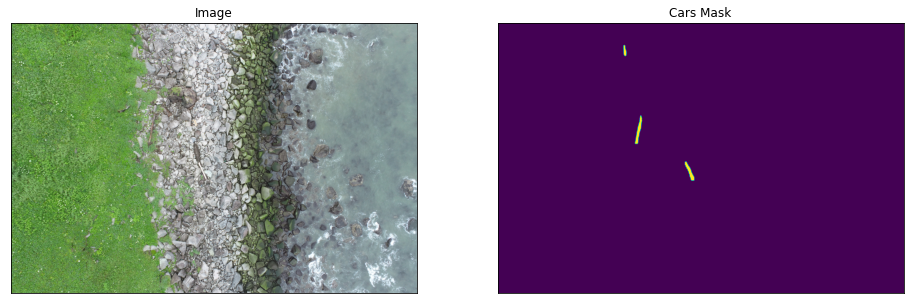

In [8]:
image, mask = dataset[3]
visualize(
    image=image, 
    cars_mask=mask[:,:,-1],
)

In [6]:
import albumentations as albu

In [7]:
def get_training_augmentation():
    train_transform = [

        albu.HorizontalFlip(p=0.5),

        albu.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0.3, shift_limit=0.1, p=1, border_mode=0),

        albu.PadIfNeeded(min_height=960, min_width=1, always_apply=True, border_mode=0),
    ]
    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.PadIfNeeded(960,1280)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        albu.augmentations.geometric.Resize(960,1280), 
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

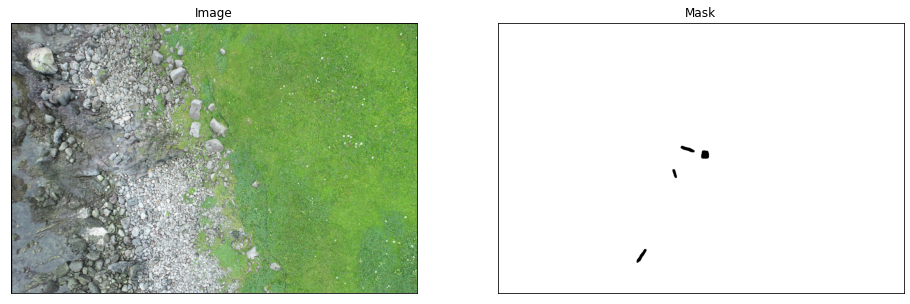

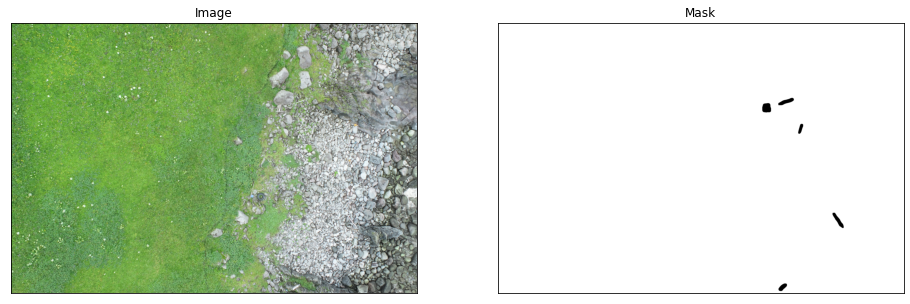

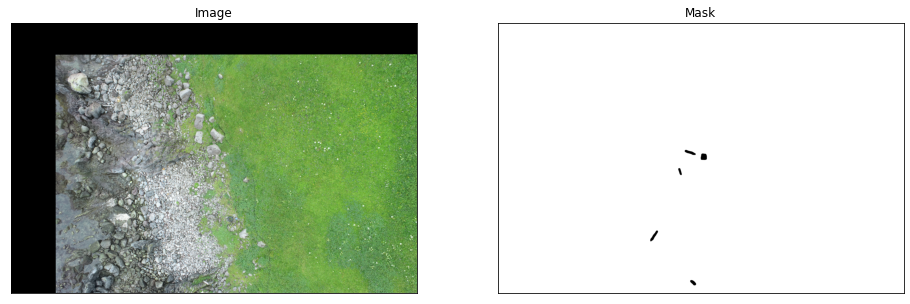

In [14]:
augmented_dataset = Dataset(
    'охотское_море/4_речка_1км', '4river_1km',
    augmentation=get_training_augmentation(), 
)

# same image with different random transforms
for i in range(3):
    image, mask = augmented_dataset[1]
    visualize(image=image, mask=mask[:,:])


In [16]:
!pip install segmentation_models_pytorch

     |████████████████████████████████| 88 kB 3.1 MB/s 
     |████████████████████████████████| 58 kB 6.9 MB/s 
     |████████████████████████████████| 376 kB 23.8 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=1845c8021b89f954d1b03374d62c0375b0cbca4dc6a36b6e95f249dfbd729597
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=4d83a565a4b438066223dfd8179357a791bb6e5c5b0875c1588de14e413bc147
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels


In [8]:
import torch
import numpy as np
import segmentation_models_pytorch as smp

In [11]:
ENCODER = 'resnet34'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = list(labels_coast1['OBJECT_TYPE'].unique())
ACTIVATION = 'softmax2d' # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
model = smp.Unet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)



In [14]:
valid_dataset = Dataset(
'4river_jpeg', '4river_1km/',
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

train_dataset = Dataset(
'охотское_море/побережье2', 'coast2',
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)


train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=2)


In [67]:
CLASSES

['metall', 'net', 'plastic', 'wood']

In [15]:
loss = smp.utils.losses.DiceLoss()
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.001),
])

In [16]:
# create epoch runners 
# it is a simple loop of iterating over dataloader`s samples
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

In [34]:
!mkdir 4river_jpeg

In [51]:
%cd 4river_jpeg
!mogrify -resize 50% *.JPG
%cd ..

/content/4river_jpeg
/content


In [50]:
!apt -y update
!apt -y install imagemagick

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [829 kB]
Hit:13 http://ppa.lau

In [35]:
!cp -r /content/охотское_море/4_речка_1км/*.JPG  4river_jpeg/

In [45]:
!apt -y install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

In [17]:
# train model for 40 epochs

max_score = 0

for i in range(0, 50):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    # do something (save model, change lr, etc.)
    #if max_score < valid_logs['iou_score']:
     #   max_score = valid_logs['iou_score']
     #   torch.save(model, './best_model.pth')
      #  print('Model saved!')
        
    if i == 25:
        optimizer.param_groups[0]['lr'] = 3e-4
        print('Decrease decoder learning rate to 3e-4!')



Epoch: 0
valid: 100%|██████████| 64/64 [01:56<00:00,  1.81s/it, dice_loss - 0.9942, iou_score - 0.002948]

Epoch: 1
valid: 100%|██████████| 64/64 [01:55<00:00,  1.80s/it, dice_loss - 0.9942, iou_score - 0.003033]

Epoch: 2
valid: 100%|██████████| 64/64 [01:52<00:00,  1.76s/it, dice_loss - 0.9942, iou_score - 0.003034]

Epoch: 3
valid: 100%|██████████| 64/64 [01:56<00:00,  1.82s/it, dice_loss - 0.9942, iou_score - 0.003012]

Epoch: 4
valid: 100%|██████████| 64/64 [01:56<00:00,  1.82s/it, dice_loss - 0.9941, iou_score - 0.002974]

Epoch: 5
valid: 100%|██████████| 64/64 [01:59<00:00,  1.87s/it, dice_loss - 0.9941, iou_score - 0.003171]

Epoch: 6
valid: 100%|██████████| 64/64 [01:56<00:00,  1.81s/it, dice_loss - 0.9943, iou_score - 0.003046]

Epoch: 7
valid: 100%|██████████| 64/64 [01:59<00:00,  1.87s/it, dice_loss - 0.9943, iou_score - 0.003158]

Epoch: 8
train:  52%|█████▎    | 42/80 [05:54<05:20,  8.44s/it, dice_loss - 0.9935, iou_score - 0.003651]


KeyboardInterrupt: ignored

array([[[-0.11430773, -0.11430773, -0.16568199, ..., -0.4225533 ,
         -0.33692953, -0.3198048 ],
        [ 0.14256358, -0.01155921, -0.14855725, ..., -0.30268002,
         -0.28555527, -0.26843053],
        [ 0.09118932, -0.1999315 , -0.06293347, ..., -0.28555527,
         -0.3883038 , -0.28555527],
        ...,
        [-0.40542856, -0.33692953, -0.5766761 , ..., -0.18280675,
         -0.14855725, -0.1999315 ],
        [-0.4225533 , -0.35405427, -0.09718298, ..., -0.14855725,
         -0.16568199, -0.11430773],
        [-0.55955136, -0.7650484 , -0.49105233, ..., -0.13143249,
         -0.26843053, -0.09718298]],

       [[ 0.66036415,  0.66036415,  0.6253501 , ..., -0.03991597,
          0.04761905,  0.06512605],
        [ 0.78291315,  0.6953781 ,  0.59033614, ...,  0.08263306,
          0.10014006,  0.11764706],
        [ 0.64285713,  0.4327731 ,  0.59033614, ...,  0.10014006,
         -0.00490196,  0.10014006],
        ...,
        [ 0.13515407,  0.17016807, -0.12745099, ...,  

In [22]:
torch.save(model, './best_model.pth')
print('Model saved!')

Model saved!


In [23]:
!cp -r /content/best_model.pth /content/drive/MyDrive/croc-hack/